# Homework Free: An Overview Of Image Processing

## Computational Linear Algebra For Large Scale Problems, Politecnico Di Torino

### Elisa Salvadori 302630

In [1]:
#Importing useful python packages 

# %matplotlib widget
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import yaml
from IPython.display import display 
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

from sklearn.datasets import load_sample_image
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import time
import math


#Initializing the random state variable rs so that the results could be replicated

rs = 302630
np.random.seed(rs)

### Image Compression

The aim of image compression is to decrease the presence of unnecessary information within the image data. This enables the storage and transmission of data in a more efficient manner.

In this project we investigate how to compress images using Singular Value Decompositiion (SVD), Principal Component Analysis and K-means. Then the three methods are compared using the Frobenious norm of the error and the time of execution.

***** Type and Shape *****
*** Flower ***


numpy.ndarray

(427, 640, 3)

*** China ***


numpy.ndarray

(427, 640, 3)

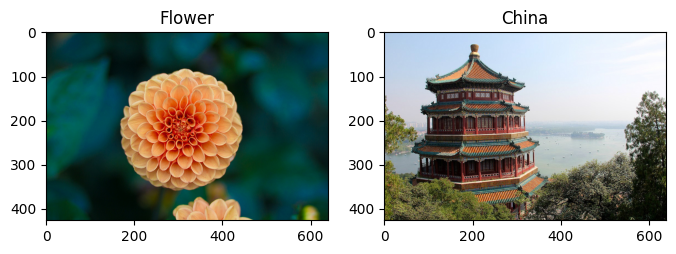

In [2]:
flower = load_sample_image('flower.jpg') #Loading color image from sklearn
china = load_sample_image('china.jpg')

img1 = np.array(flower, dtype = np.float64) / 255 #Converting image
img2 = np.array(china, dtype = np.float64) / 255

print("***** Type and Shape *****")
print("*** Flower ***")
display(type(flower)) #Type of loaded image                           
display(flower.shape) #Shape

print("*** China ***")
display(type(china)) #Type of loaded image                           
display(china.shape) #Shape


fig = plt.figure(figsize = (8, 8)) #Plotting
fig.add_subplot(121)
plt.title("Flower")
plt.imshow(img1)
fig.add_subplot(122)
plt.title("China")
plt.imshow(img2)

The figures are arrays of shape (427 x 640 x 3), the first two values are the width and height of the image while the last value specifies that there are 3 color channels.
 
The default coding is based on the uint8 type to sparse memory, in order to use algorithms we convert it to a floating point representation and then scale it to the range (0, 1).

***** Plot of the three channels of flower image *****


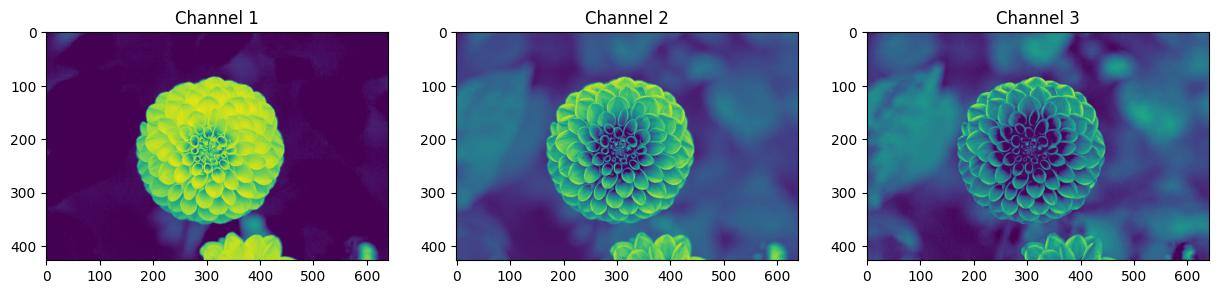

***** Plot of the three channels of China image *****


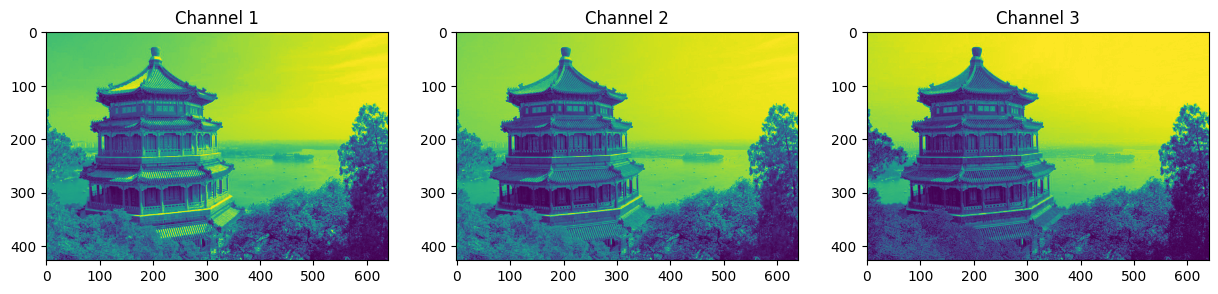

In [3]:
#Splitting the three channel

#Flower
C1 = []
C1_1 = img1[:, :, 0] 
C2_1 = img1[:, :, 1] 
C3_1 = img1[:, :, 2] 
C1.append(C1_1)
C1.append(C2_1)
C1.append(C3_1)

#China
C2 = []
C1_2 = img2[:, :, 0] 
C2_2 = img2[:, :, 1] 
C3_2 = img2[:, :, 2] 
C2.append(C1_2)
C2.append(C2_2)
C2.append(C3_2)


print("***** Plot of the three channels of flower image *****")
#Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Channel 1")
plt.imshow(C1_1)
fig.add_subplot(132)
plt.title("Channel 2")
plt.imshow(C2_1)
fig.add_subplot(133)
plt.title("Channel 3")
plt.imshow(C3_1)
plt.show()

print("***** Plot of the three channels of China image *****")
#Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Channel 1")
plt.imshow(C1_2)
fig.add_subplot(132)
plt.title("Channel 2")
plt.imshow(C2_2)
fig.add_subplot(133)
plt.title("Channel 3")
plt.imshow(C3_2)
plt.show()

#### SVD

The SVD decomposition decomposes a matrix A $\in \mathbb{R}^{nxm}$ in two orthogonal matrices U $\in \mathbb{R}^{nxn}$, V $\in \mathbb{R}^{mxm}$ and a diagonal matrix as $\Sigma \in \mathbb{R}^{nxm}$ such that $A = U \Sigma V^T$.

An image could be approximated with a lower-rank matrix via SVD decomposition such that, if A is the matrix which represents the image, then the compressed image is represented by $A_k = \sum_{i = 1}^{k} \sigma_i u_i v_i^T$.

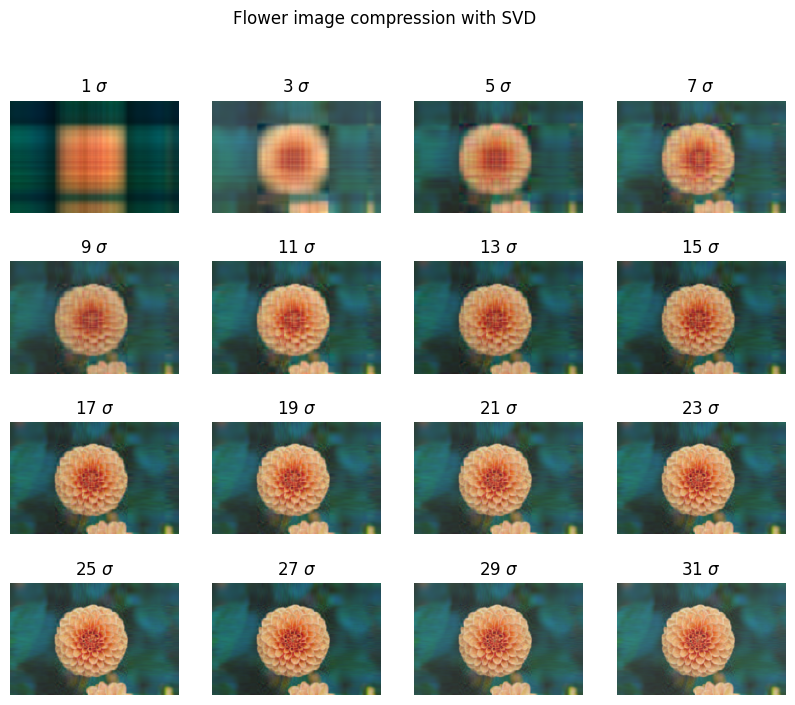

In [4]:
#SVD for Flower
fig_col, axs_col = plt.subplots(4, 4)
fig_col.set_size_inches(10, 8)
fig_col.suptitle("Flower image compression with SVD")


SVD_error_1 = []
SVD_time_1 = []

for idx, k in enumerate(range(1, 32, 2)): #Different values of k for reconstruction
    row_index = idx // 4
    column_index = idx % 4
    
    start = time.time() #Start time
    
    compressed_channel_list = []
    
    for color in C1: #For every layer
        U, sigma, Vt = np.linalg.svd(color) #Decomposition
        compressed_channel = np.dot(U[:, :k], np.dot(np.diag(sigma[:k]), Vt[:k, :])) #Reconstruction
        
        compressed_channel_list.append(compressed_channel) #Append the compressed channel
    
    #Image with 3 channels
    img_compressed = np.dstack((compressed_channel_list[0], compressed_channel_list[1], compressed_channel_list[2])) 
    
    end = time.time() #End time
    
    SVD_time_1.append(end - start) #Append the execution time one value of k
    SVD_error_1.append(np.linalg.norm(img1 - img_compressed)) #Append the norm for one value of k
    
    img_compressed = (img_compressed - img_compressed.min()) / (img_compressed.max() - img_compressed.min()) #Only for visualization

    axs_col[row_index][column_index].imshow(img_compressed)
    
    axs_col[row_index][column_index].set_title(f"{k} $\sigma$")
    axs_col[row_index][column_index].axis('off')

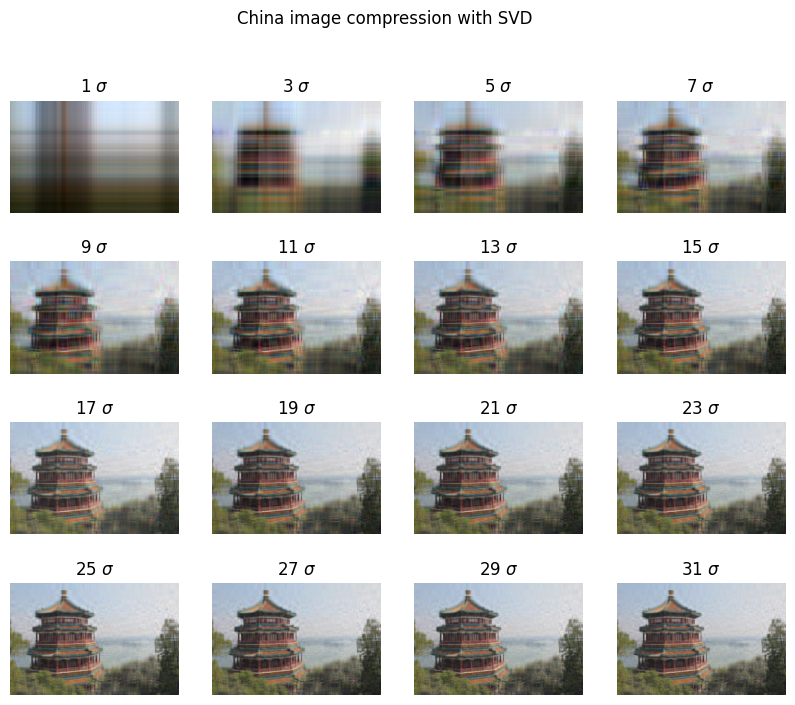

In [5]:
#SVD for China
fig_col, axs_col = plt.subplots(4, 4)
fig_col.set_size_inches(10, 8)
fig_col.suptitle("China image compression with SVD")


SVD_error_2 = []
SVD_time_2 = []

for idx, k in enumerate(range(1, 32, 2)): #Different values of k for reconstruction
    row_index = idx // 4
    column_index = idx % 4
    
    start = time.time() #Start time
    
    compressed_channel_list = []
    
    for color in C2: #For every layer
        U, sigma, Vt = np.linalg.svd(color) #Decomposition
        compressed_channel = np.dot(U[:, :k], np.dot(np.diag(sigma[:k]), Vt[:k, :])) #Reconstruction
        
        compressed_channel_list.append(compressed_channel) #Append the compressed channel
    
    img_compressed = np.dstack((compressed_channel_list[0], compressed_channel_list[1], compressed_channel_list[2])) #Image with 3 channels

    end = time.time() #End time
    
    SVD_time_2.append(end - start) #Append the execution time one value of k
    SVD_error_2.append(np.linalg.norm(img2 - img_compressed)) #Append the norm for one value of k
    
    img_compressed = (img_compressed - img_compressed.min()) / (img_compressed.max() - img_compressed.min()) #Only for visualization

    axs_col[row_index][column_index].imshow(img_compressed)
    
    axs_col[row_index][column_index].set_title(f"{k} $\sigma$")
    axs_col[row_index][column_index].axis('off')

#### PCA 

In this section PCA algortithm is used for image compressione, we expect a better result than SVD but also in this case we keep in track the execution time and the Frobenious norm of the difference between the original matrix and the low-rank approximation matrix, for different values of k (number of Principal Components).

sklearn.decomposition.PCA is implemented through SVD decomposition.


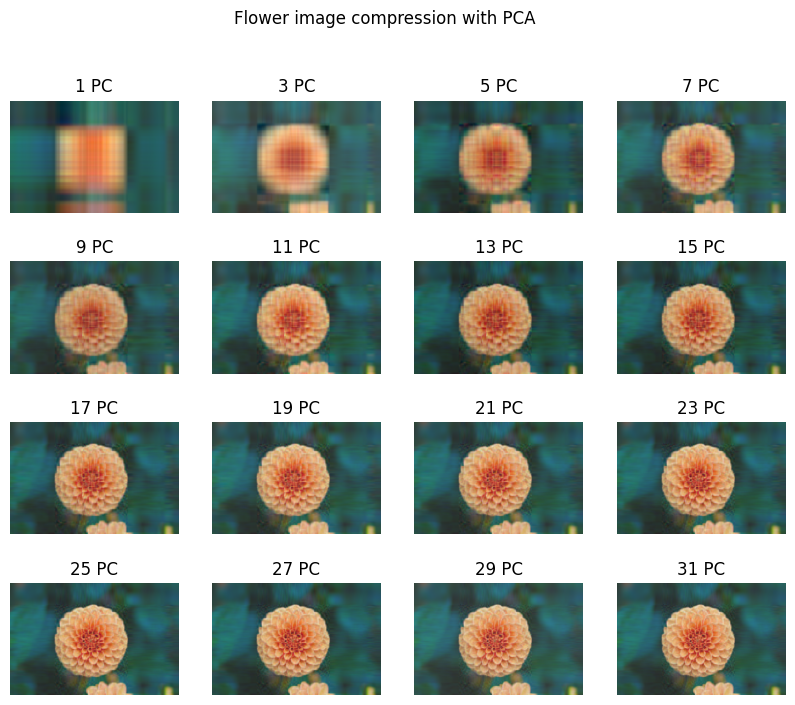

In [6]:
#PCA for Flower
fig_col, axs_col = plt.subplots(4, 4)
fig_col.set_size_inches(10, 8)
fig_col.suptitle("Flower image compression with PCA")


PCA_error_1 = []
PCA_time_1 = []

for idx, k in enumerate(range(1, 32, 2)): #Different values of k for reconstruction
    row_index = idx // 4
    column_index = idx % 4
    
    start = time.time() #Start time
    
    compressed_channel_list = []
    
    for color in C1: #For every layer
        pca = PCA(n_components = k, random_state = rs) #Initialize PCA
        projected_channel = pca.fit_transform(color) #Fit and transform data
        compressed_channel = pca.inverse_transform(projected_channel)
        
        compressed_channel_list.append(compressed_channel) #Append the compressed channel
    
    img_compressed = np.dstack((compressed_channel_list[0], compressed_channel_list[1], compressed_channel_list[2])) #Image with 3 channels

    end = time.time() #End time
    
    PCA_time_1.append(end - start) #Append the execution time one value of k
    PCA_error_1.append(np.linalg.norm(img1 - img_compressed)) #Append the norm for one value of k
    
    img_compressed = (img_compressed - img_compressed.min()) / (img_compressed.max() - img_compressed.min()) #Only for visualization

    axs_col[row_index][column_index].imshow(img_compressed)
    
    axs_col[row_index][column_index].set_title(f"{k} PC")
    axs_col[row_index][column_index].axis('off')

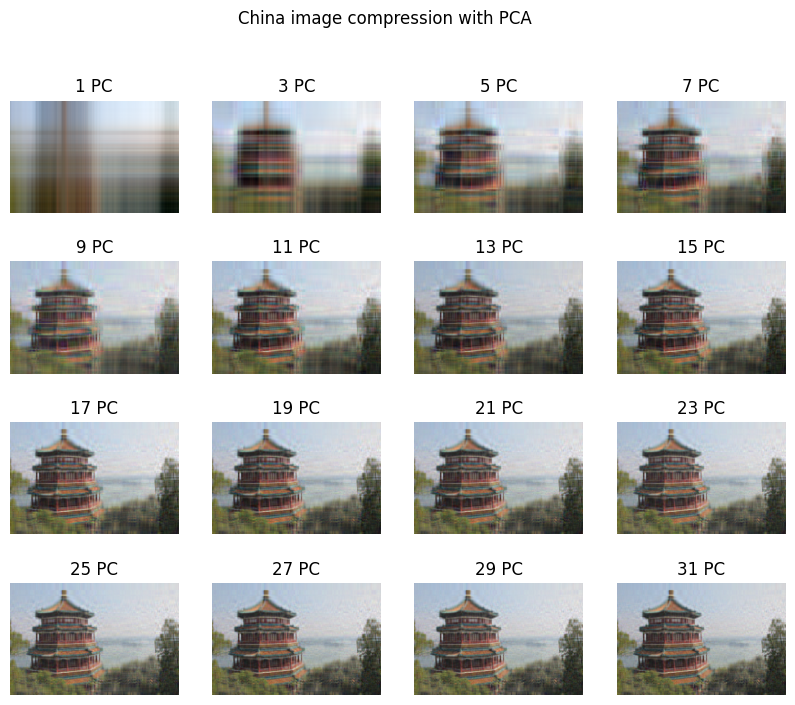

In [7]:
#PCA for China
fig_col, axs_col = plt.subplots(4, 4)
fig_col.set_size_inches(10, 8)
fig_col.suptitle("China image compression with PCA")


PCA_error_2 = []
PCA_time_2 = []

for idx, k in enumerate(range(1, 32, 2)): #Different values of k for reconstruction
    row_index = idx // 4
    column_index = idx % 4
    
    start = time.time() #Start time
    
    compressed_channel_list = []
    
    for color in C2: #For every layer
        pca = PCA(n_components = k, random_state = rs) #Initialize PCA
        projected_channel = pca.fit_transform(color) #Fit and transform data
        compressed_channel = pca.inverse_transform(projected_channel)
        
        compressed_channel_list.append(compressed_channel) #Append the compressed channel
    
    img_compressed = np.dstack((compressed_channel_list[0], compressed_channel_list[1], compressed_channel_list[2])) #Image with 3 channels

    end = time.time() #End time
    
    PCA_time_2.append(end - start) #Append the execution time one value of k
    PCA_error_2.append(np.linalg.norm(img2 - img_compressed)) #Append the norm for one value of k
    
    img_compressed = (img_compressed - img_compressed.min()) / (img_compressed.max() - img_compressed.min()) #Only for visualization

    axs_col[row_index][column_index].imshow(img_compressed)
    
    axs_col[row_index][column_index].set_title(f"{k} PC")
    axs_col[row_index][column_index].axis('off')

#### K-means

The original images contains a lot of colors, it is possible to use K-means clustering algorithm to reduce the number of colors involved, so that only a certain number of values will be stored. 

Each pixel could be considered as a point in 3D. So each image is flattened and then Kmeans clustering could be performed to get cluster centroids and cluster labels for each pixel, then each pixel is replaced with its cluster centroid. 

Doing this we reduce the number of colors required, while preserving quality. Also in this case the algorithm is tested with different number of k (number of clusters).

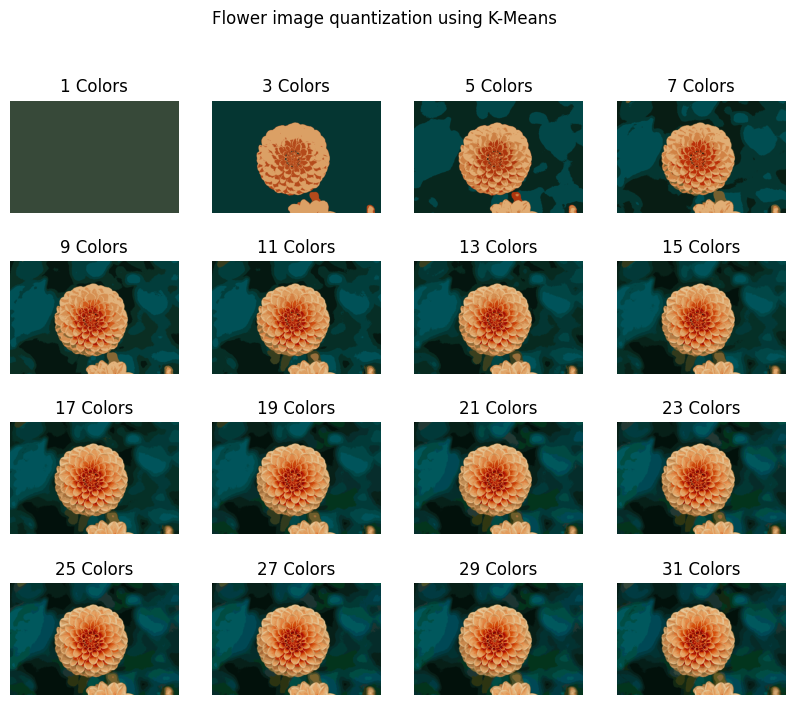

In [8]:
#K-Means for Flower
fig_col, axs_col = plt.subplots(4, 4)
fig_col.set_size_inches(10, 8)
fig_col.suptitle("Flower image quantization using K-Means")


K_error_1 = []
K_time_1 = []

img1_flatten = img1.reshape(img2.shape[0] * img2.shape[1], 3)

for idx, k in enumerate(range(1, 32, 2)): #Different values of k for reconstruction
    row_index = idx // 4
    column_index = idx % 4
    
    start = time.time() #Start time
    
    kmeans = KMeans(n_clusters = k, random_state = rs) #Initialize K-means
    kmeans.fit(img1_flatten) #Fitting K-means
    
    img_quantized = kmeans.cluster_centers_[kmeans.predict(img1_flatten)] #Predict labels and then replace each pixel with its centroid

    img_quantized = img_quantized.reshape(img1.shape) #Reshape image
    
    end = time.time() #End time
    
    K_time_1.append(end - start) #Append the execution time one value of k
    K_error_1.append(np.linalg.norm(img1 - img_quantized)) #Append the norm for one value of k
    
    axs_col[row_index][column_index].imshow(img_quantized)
    
    axs_col[row_index][column_index].set_title(f"{k} Colors")
    axs_col[row_index][column_index].axis('off')

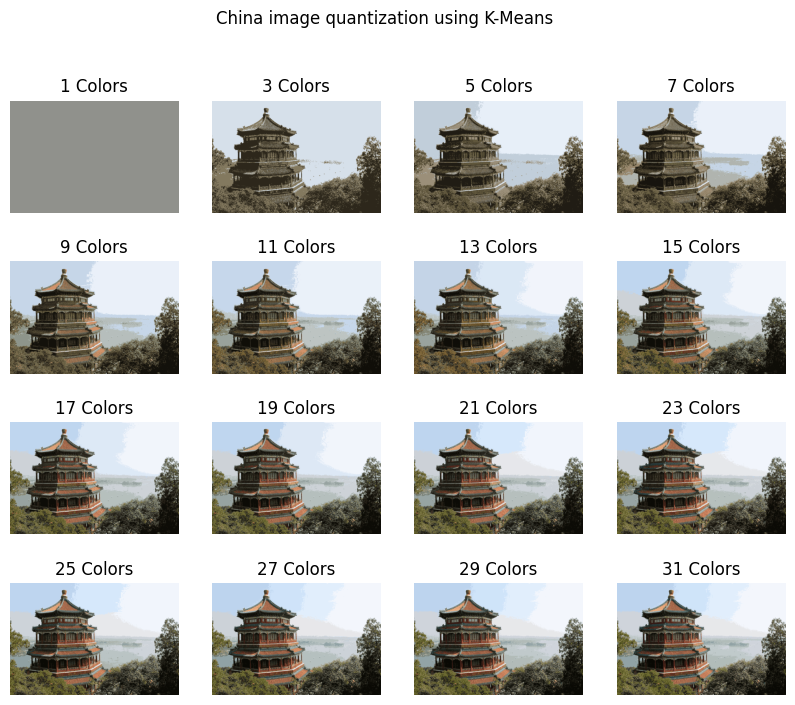

In [9]:
#K-Means for China
fig_col, axs_col = plt.subplots(4, 4)
fig_col.set_size_inches(10, 8)
fig_col.suptitle("China image quantization using K-Means")


K_error_2 = []
K_time_2 = []

img2_flatten = img2.reshape(img2.shape[0] * img2.shape[1], 3)

for idx, k in enumerate(range(1, 32, 2)): #Different values of k for reconstruction
    row_index = idx // 4
    column_index = idx % 4
    
    start = time.time() #Start time
    
    kmeans = KMeans(n_clusters = k, random_state = rs) #Initialize K-means
    kmeans.fit(img2_flatten) #Fitting K-means
    
    img_quantized = kmeans.cluster_centers_[kmeans.predict(img2_flatten)] #Predict labels and then replace each pixel with its centroid

    img_quantized = img_quantized.reshape(img2.shape) #Reshape image
    
    end = time.time() #End time
    
    K_time_2.append(end - start) #Append the execution time one value of k
    K_error_2.append(np.linalg.norm(img2 - img_quantized)) #Append the norm for one value of k
    
    axs_col[row_index][column_index].imshow(img_quantized)
    
    axs_col[row_index][column_index].set_title(f"{k} Colors")
    axs_col[row_index][column_index].axis('off')

#### Comparison and Results

As said before, performance of the three methods can be evaluated by execution time, the following graph shows the elapsed time as a function of k, where k is the number of singular values for the truncated SVD, the number of Principal Components and the number of clusters.

Another evaluation metric is the Frobenious norm of the error i.e. the Frobenious norm of the difference between the original matrix of the image and the matrix of the compressed image.

In addition, from the literature ([1](https://www.sciencedirect.com/science/article/pii/S1319157819302460)), it is also plotted the graph of the space saving, variating k (only for SVD and PCA). In particular, the compression ratio (CR) is defined as: $\frac{N \times M}{k \times (N + M + 1)}$ (it has to be larger than 1 to have an effective compression) and the percentage of space saving is $(1 - \frac{1}{CR}) \times 100$.

It is also important to take into account that the performance of each method is not directly comparable with the others, because at a specific value of k, the methods produce three different compressed images, PCA with k PCs is not the same of SVD with k singular values (reasonably beacause PCA coincides with the reconstruction via truncated SVD only if the original matrix is centered), and K-means is a clustering method.
But we could notice that, while K-means has not an objective evaluation metric, for the first two methods the value of k defines the percentage of space saving. So fixed the value of k, the percentage of space saving is the same while the error of reconstruction could be compared. The aim of the evaluation is to comprehend the general behavior.

***** Percentage of Space Saving *****


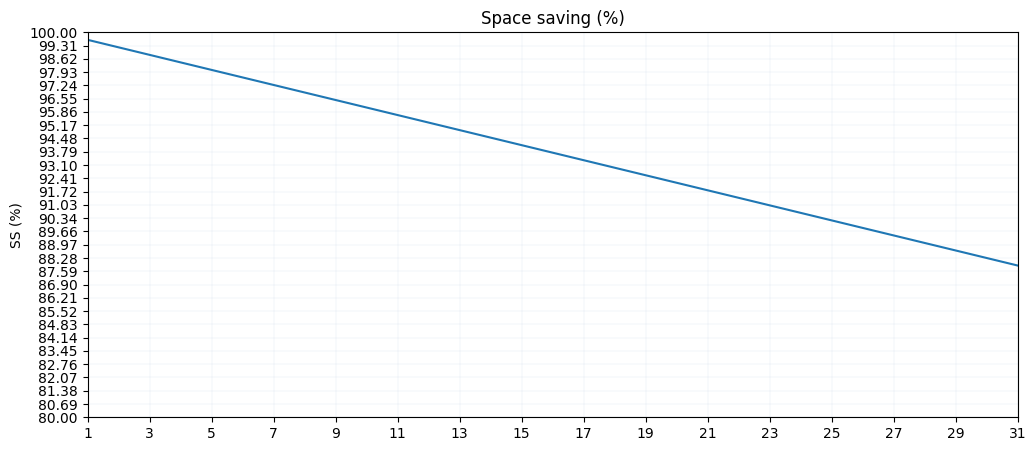

In [10]:
print("***** Percentage of Space Saving *****")

SS = []
for k in range(1, 32, 2):
    CR = (img1.shape[0] * img1.shape[1]) / (k * (img1.shape[0] + img1.shape[1] + 1))
    SS.append((1 - 1/CR) * 100)

#SPACE SAVING 
plt.figure(figsize = (12, 5))
plt.margins(x = 0)
plt.plot(range(1, 32, 2), SS)
plt.title('Space saving (%)')
plt.xticks(ticks = range(1, 32, 2), labels = [f'{i}' for i in range(1, 32, 2)])
plt.ylabel('SS (%)')
plt.yticks(ticks = np.linspace(80, 100, num = 30))
plt.ylim(ymin = 80, ymax = 100)
plt.grid(color = 'lightsteelblue', linestyle = '-', linewidth = 0.12)
plt.show()

***** Graph comparison flower image *****


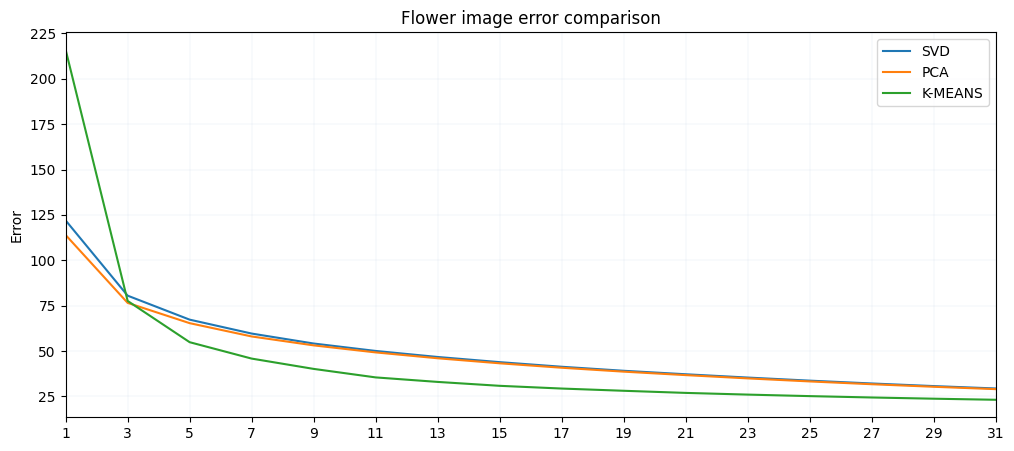

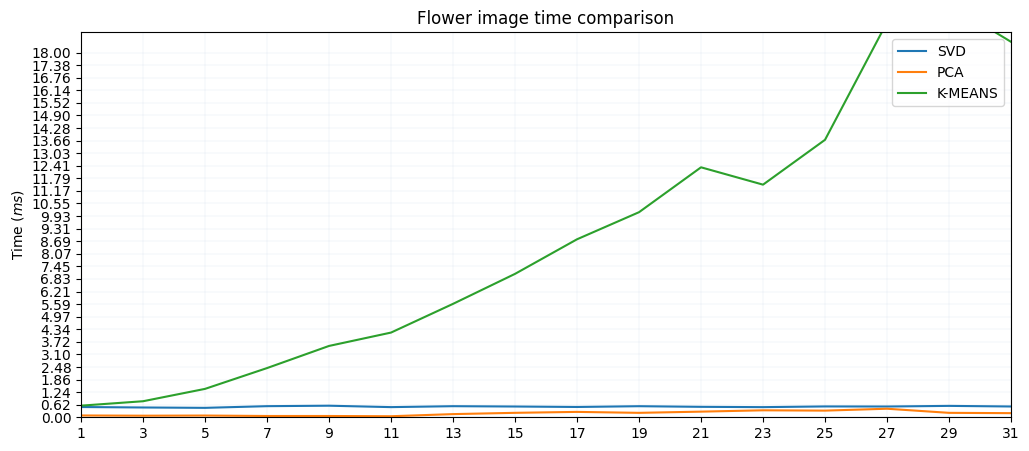

In [11]:
print("***** Graph comparison flower image *****")

#ERROR COMPARISON
plt.figure(figsize = (12, 5))
plt.margins(x = 0)
plt.plot(range(1, 32, 2), SVD_error_1, label = "SVD")
plt.plot(range(1, 32, 2), PCA_error_1, label = "PCA")
plt.plot(range(1, 32, 2), K_error_1, label = "K-MEANS")
plt.title('Flower image error comparison')
plt.xticks(ticks = range(1, 32, 2), labels = [f'{i}' for i in range(1, 32, 2)])
plt.legend(loc = "upper right")
plt.ylabel('Error')
plt.grid(color = 'lightsteelblue', linestyle = '-', linewidth = 0.12)
plt.show()


#TIME COMPARISON
plt.figure(figsize = (12,5))
plt.margins(x = 0)
plt.plot(range(1, 32, 2), SVD_time_1, label = "SVD")
plt.plot(range(1, 32, 2), PCA_time_1, label = "PCA")
plt.plot(range(1, 32, 2), K_time_1, label = "K-MEANS")

plt.title('Flower image time comparison')
plt.xticks(ticks = range(1, 32, 2), labels = [f'{i}' for i in range(1, 32, 2)])
plt.yticks(ticks = np.linspace(0, 18, num = 30))
plt.legend(loc = "upper right")
plt.ylabel('Time ($ms$)')
plt.ylim(ymin = 0, ymax = 19)
plt.grid(color = 'lightsteelblue', linestyle = '-', linewidth = 0.12)
plt.show()

***** Graph comparison China image *****


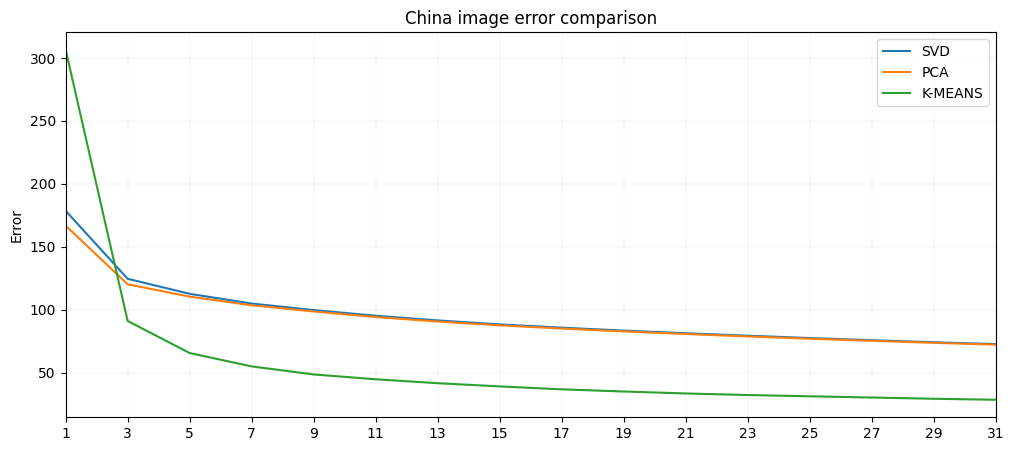

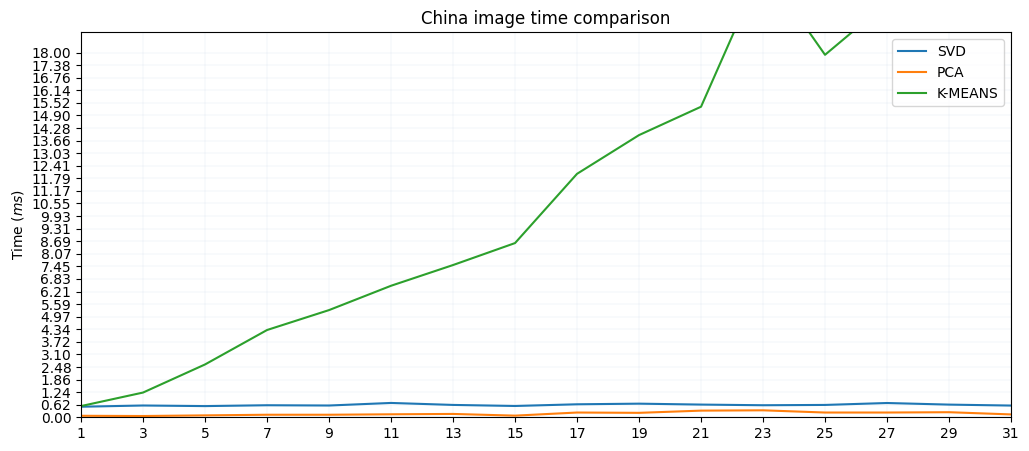

In [12]:
print("***** Graph comparison China image *****")

#ERROR COMPARISON
plt.figure(figsize = (12, 5))
plt.margins(x = 0)
plt.plot(range(1, 32, 2), SVD_error_2, label = "SVD")
plt.plot(range(1, 32, 2), PCA_error_2, label = "PCA")
plt.plot(range(1, 32, 2), K_error_2, label = "K-MEANS")
plt.title('China image error comparison')
plt.xticks(ticks = range(1, 32, 2), labels = [f'{i}' for i in range(1, 32, 2)])
plt.legend(loc = "upper right")
plt.ylabel('Error')
plt.grid(color = 'lightsteelblue', linestyle = '-', linewidth = 0.12)
plt.show()


#TIME COMPARISON
plt.figure(figsize = (12,5))
plt.margins(x = 0)
plt.plot(range(1, 32, 2), SVD_time_2, label = "SVD")
plt.plot(range(1, 32, 2), PCA_time_2, label = "PCA")
plt.plot(range(1, 32, 2), K_time_2, label = "K-MEANS")

plt.title('China image time comparison')
plt.xticks(ticks = range(1, 32, 2), labels = [f'{i}' for i in range(1, 32, 2)])
plt.yticks(ticks = np.linspace(0, 18, num = 30))
plt.legend(loc = "upper right")
plt.ylabel('Time ($ms$)')
plt.ylim(ymin = 0, ymax = 19)
plt.grid(color = 'lightsteelblue', linestyle = '-', linewidth = 0.12)
plt.show()

By having a look to the plotted images after algorithms, we could make some considerations:
1. With SVD the Flower image reaches quite satisfactory results only with k = 11, the flower is distinguishable and has a quite defined contour, with k = 11 we have a percentage of space saving about 95%, while China image is not very good with only 11 singular values.
2. With PCA, only by visual perception, it is not easily to distinguish whether it performs better than SVD in terms of sharpness.
3. With K-means clustering, only by visual perception, with very few number of clusters the flower color of flower image are clear while China image takes at least 9 clusters to achieve a good quality, with fewer colors the image tends to seem not colored at all.

Regarding Space saving with SVD or PCA, we could notice that also with k = 31 the space saving is about 85% and images reach satisfactory results observed by human eyes.

Observing error curves for the two images we could see that SVD and PCA reach comparable level of accuracy, while for both images the error for the quatitized image with K-means is lesser than other errors and it is more expensive in terms of time, but it cannot be compared with other methods. For what it concerns the execution time, although PCA has more computations to do, it performs better than SVD, but overall they are very fast.

In conclusion, K-means algorithm achieves satisfying results in terms of visual perception, but it is not comparable.
While PCA and SVD seems to be very similar in terms of accuracy and execution time.

### Face recognition using eigenfaces

The aim of this project is to perform face recognition using the Olivetti dataset, which is comprised by 10 different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

The image is stored as 64x64, quantized to 256 grey levels and stored as unsigned 8-bit integers while the loader will convert these to floating point values on the interval (0, 1).

The target label is an integer from 0 to 39 indicating the identity of the person pictured.

Algorithm for face recognition using eigenfaces:
1. Image need to be stored as vector of length 4096, instead of 64x64;
2. Compute the average face;
3. Subtract average face from every image vector;
4. Compute Covariance matrix;
5. Find eigenvectors and eigenvalues of the covariance matrix;
6. Project the original faces into new space.

7. For testing: remove the average face from test image and project onto the new space, then compute the distance between the test face and the train faces and find the label of the face which minimize the distance.

In [13]:
#Loading the Olivetti dataset as faces and the Olivetti target as targets

faces, targets = fetch_olivetti_faces(return_X_y = True, shuffle = False, random_state = rs)

n_samples, n_features = faces.shape #Storing the shape of the dataset

display(faces.shape)

(400, 4096)

For analyze how it works, we split the dataset in train and test as 70% and 30%.

In [14]:
#Split faces and targets as Training e Test set

faces_train, faces_test, targets_train, targets_test = train_test_split(faces, targets, test_size = 0.3, 
                                                                        random_state = rs, stratify = targets)

For sake of visualization we could plot one image for subject.

Text(0.5, 0.98, '40 people of the Dataset')

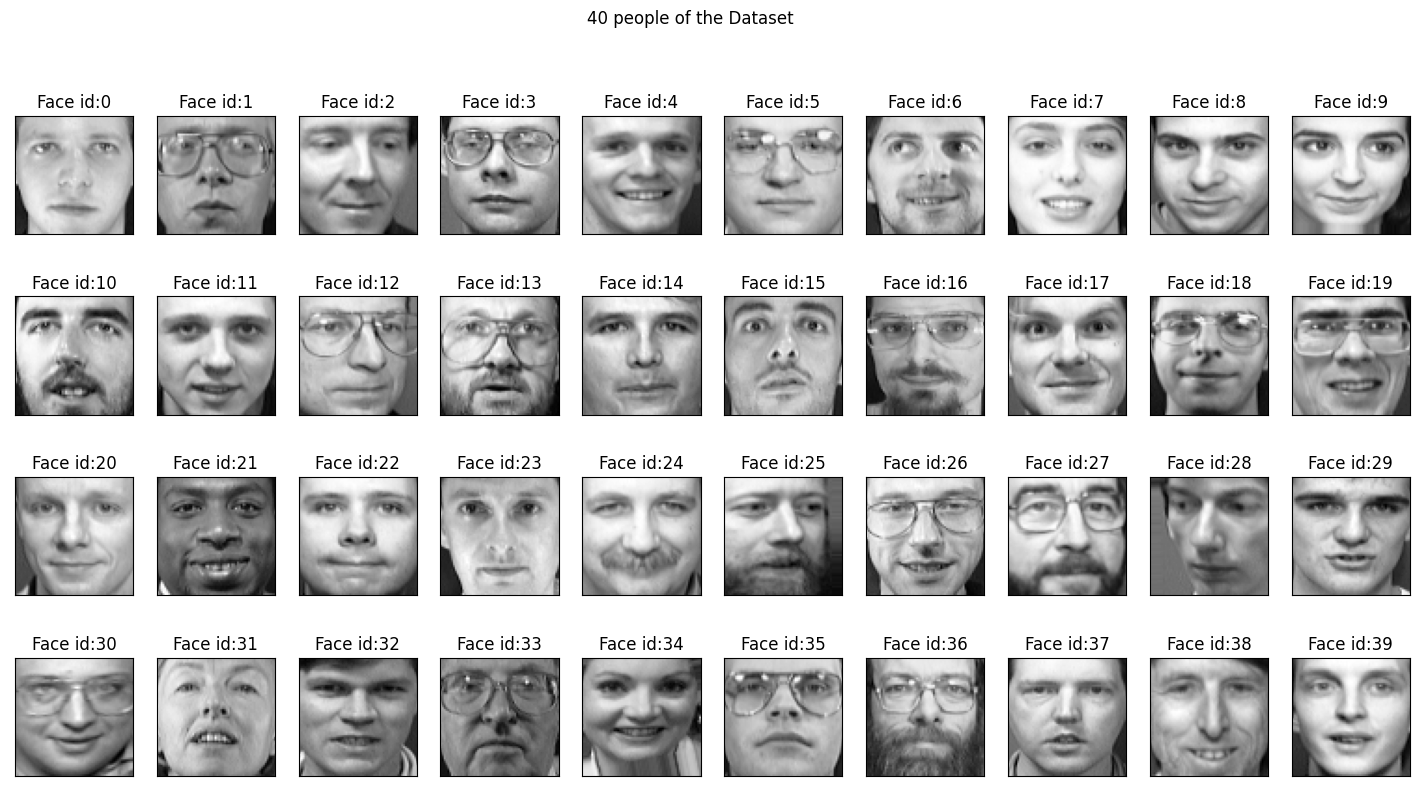

In [15]:
#Creating 4X10 subplots in  18x9 figure size
fig, axarr = plt.subplots(nrows = 4, ncols = 10, figsize = (18, 9))
axarr = axarr.flatten()

#iterating over user ids
for label in np.unique(targets_train):
    for label_train in targets_train:
        if label_train == label:
            index = np.array(np.where(targets_train == label_train))[0][0]
            axarr[label].imshow(faces_train[index].reshape((64, 64)), cmap = 'gray')
            axarr[label].set_xticks([])
            axarr[label].set_yticks([])
            axarr[label].set_title("Face id:" + str(targets_train[index]))
            break 
plt.suptitle("40 people of the Dataset")

Then we compute the average face, which will be substracted from every faces and we show it.

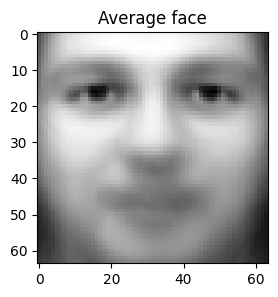

In [16]:
#Computing the average face and substract it from avery image
average_train_face = faces_train.mean(axis = 0)
faces_train_centered = faces_train - faces_train.mean(axis = 0)


#Plotting the average face
fig = plt.figure(figsize = (3, 3))
plt.title("Average face")
plt.imshow(faces_train.mean(axis = 0).reshape(64, 64), cmap = 'gray')

Now we apply the PCA to get the eigenfaces:

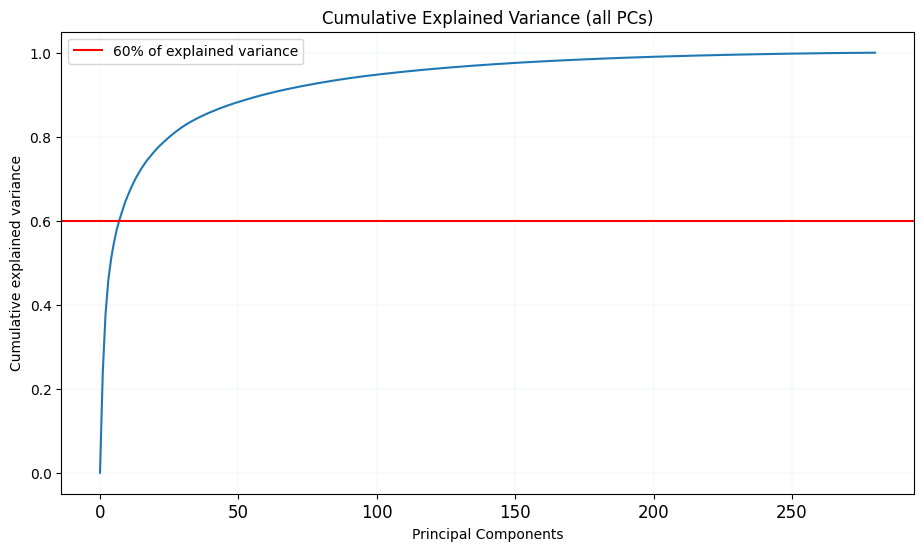

In [17]:
#Apllying the full PCA (without dimensionality reduction)
pca = PCA(random_state = rs, whiten = True) 
pca.fit(faces_train_centered) #PCA


#Making the comulative explained variance plot
plt.figure(figsize = (11, 6))
plt.plot(np.insert(np.cumsum(pca.explained_variance_ratio_), 0, 0))
plt.axhline(y = 0.60, color = 'red', linestyle = '-', label = "60% of explained variance")
plt.legend()
plt.title('Cumulative Explained Variance (all PCs)')
#plt.xticks(ticks = np.arange(1, pca.n_features_ + 1), labels = [])
plt.xticks(fontsize = 12)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative explained variance')
plt.grid(color = 'lightsteelblue', linestyle = '-', linewidth = 0.12)
plt.show()

Initialize the PCA with percentage of explained variance = 60% and then we plot the found eigenfaces. 

Text(0.5, 0.98, 'Eigen Faces')

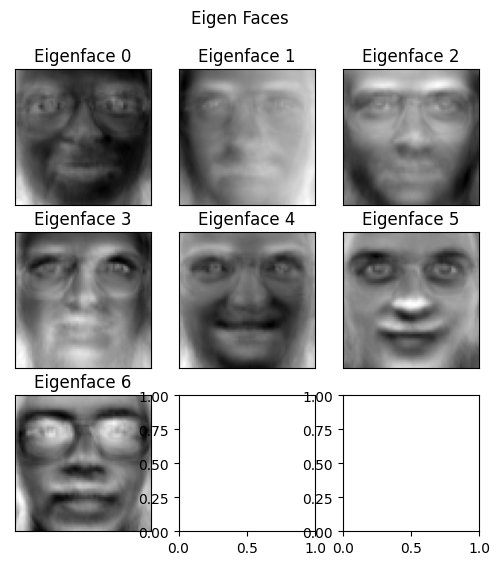

In [18]:
#Apllying PCA and plotting the eigenfaces
pca = PCA(n_components = 0.6, random_state = rs, whiten = True) 
pca.fit(faces_train_centered) #PCA 

number_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_eigenfaces, 64, 64))

number_eigenfaces = len(pca.components_)

eigen_faces = pca.components_.reshape((number_eigenfaces, 64, 64))

cols = 3
rows = math.ceil(number_eigenfaces / cols)
fig, axarr = plt.subplots(nrows = rows, ncols = cols, figsize = (6, 6))
axarr = axarr.flatten()
for i in range(number_eigenfaces):
    axarr[i].imshow(eigen_faces[i], cmap = "gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("Eigenface " + str(i))
plt.suptitle("Eigen Faces")

Now apply the transformation to train data and test data.

In [19]:
faces_test_centered = faces_test - faces_train.mean(axis = 0) #Substarct average face from test

faces_train_pca = pca.transform(faces_train_centered) #Transform train data
faces_test_pca = pca.transform(faces_test_centered) #Transform test data

For every face in the test dataset, we will find the label of the face in the train dataset which minimize the distance and then we compute the accuracy of the algorithm.

In [20]:
labels = []  #Retrieved test label

for test_image in faces_test_pca: #For-cycle test images
    norms = [] #List with norm between fixed test image and train images
    for train_image in faces_train_pca:
        norm = np.linalg.norm(test_image - train_image) #Computing the norm
        norms.append(norm)
    min_norm = min(norms)  #Minimum norm between testimage and train images
    
    index = np.array(np.where(norms == min_norm))[0][0] #Getting the index of the nearest face
    labels.append(targets_train[index]) #Getting the label of the nearest face

In [21]:
acc = accuracy_score(targets_test, labels)

print("***** The accuracy for the test is: " + str(acc * 100) + " %")

***** The accuracy for the test is: 83.33333333333334 %


The proposed method, reaches satisfactory result with toy dataset such as Olivetti dataset, achieving an accuracy of 83% with only 6 eigenfaces, an interesting project is to test the algorithm with a more complex dataset.

### References

([An efficient technique for image compression and quality retrieval using matrix completion](https://www.sciencedirect.com/science/article/pii/S1319157819302460))

([Eigenfaces for recognition](https://www.face-rec.org/algorithms/PCA/jcn.pdf))